# Storing and operating on bitstrings on the quantum computer (2)

### Contributors
Łukasz Herok, Rudy Raymond, James Wootton

This tutorial bases heavily upon "Comparing Strings with Quantum Superpositon" tutorial by Rudy Raymond. It also repeats the basics that can be found in the other resuorce and in the quiskit documentation (see the Reffernces section) to make it standalone and comperhensive introduction to the tutorial topic.

## Motivation

Tha aim of this tutorial is to show you how quantum computers, usuing the superposition effect, can store information encoded in a bitstring in more comperhensive way.

On the very beging we will go through all the basics step by step, so if you are familliar with basics you can just skip this sections.

The aim of this tutorial is to show in details how to store bitstring in the quantum computer and how we can manipulate it.

In [1]:
# Import of the modules and initialization of varibles used in this tutorial
import numpy as np
import qiskit
from qiskit import Aer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import execute
import math
from qiskit.tools.visualization import plot_histogram

# qiskit.IBMQ.load_accounts()
backend = Aer.get_backend('qasm_simulator')
backend_vec= Aer.get_backend('statevector_simulator')

## Bit vs Qbit

The computer bit can store and manipulte on the two states `0` and `1`. This two states maps to the two qubit (orhtonormal) basis states:


$ |0> = {\begin{bmatrix}1 \\ 0\end{bmatrix}} $,

$ |1> = {\begin{bmatrix}0 \\ 1\end{bmatrix}} $.

In fact he qubit state is represented by the linear superposition of these two basics states

$ |q> = \alpha |0> + \beta |1> $
so we can write
$ |q> = {\begin{bmatrix}\alpha \\ 0\end{bmatrix}} +  {\begin{bmatrix}0 \\ \beta \end{bmatrix}} =  {\begin{bmatrix} \alpha \\ \beta \end{bmatrix}} $. 

The $ \alpha $ and $ \beta $ are so called the probability amplitudes, and are just the complex numbers that using the formula $|\alpha|^2$ tells us about the probabilty that the qubit is in state `|0>`. So these coefficients have to meet the requirement $|\alpha|^2 + |\beta|^2  = 1$ to have the overall probabilty equals to one. 

So as we can see, the qubit can exists in a *superposition* of states, and by the final measurement we can only check the probability of each state. For the quantum computing beside the basis states `|0>`, `|1>` we often encounter the superpostion states that are marked by `|+>`, `|->`. In these states there is is qual probabilty ($|\alpha|^2$ = 0.5 and $|\beta|^2 = 0.5 $) that the qubit is in one of the basis states `|0>` or `|1>` state. The other possible states are generally called the *Mixed states*.

For example we can change the state of the qubit from `|0>` to `|+>` and back to `|0>` using the *Hadamard gate*. There is no similar opertion avaible for bits, as they only operates on two states `0,1`. 

### Math
The Hadamard gate is a matrix: 

$H =  \frac{1}{\sqrt{2}} {\begin{bmatrix}1 & 1\\1 & -1\end{bmatrix}} $,

to create a superpostion for the `|0>` state:

$ H|0> 
= \frac{1}{\sqrt{2}} {\begin{bmatrix}1 & 1\\1 & -1\end{bmatrix}} {\begin{bmatrix}1 \\0\end{bmatrix}} 
= \frac{1}{\sqrt{2}} {\begin{bmatrix}1\cdot1 + 1\cdot0 \\ 1\cdot1 -1\cdot0\end{bmatrix}}
=  {\begin{bmatrix}0,7071 \\ 0,7071\end{bmatrix}}
= |+>
$

so $\alpha = 0.7071$ and $\beta = 0.7071$, making square of these we can get 0.5 propbility that the qubit is in state `|0>` and `|1>`.

We can of course go back to the `|0>` using the Hadamard gate again:

$ H|+> 
= \frac{1}{\sqrt{2}} {\begin{bmatrix}1 & 1\\1 & -1\end{bmatrix}} {\begin{bmatrix}\frac{1}{\sqrt{2}}  \\\frac{1}{\sqrt{2}} \end{bmatrix}} 
= {\begin{bmatrix}1 \\ 0\end{bmatrix}}
= |0>
$


### Numeric

In [2]:
# |0>
Zero = np.array([[1.],
                 [0.]]) 

H = 1./np.sqrt(2) * np.array([[1, 1],
                              [1, -1]])

print("Initial state |0> \n %s " % Zero)

Sup = np.dot(H, Zero)
print("\n H|0> = |+> \n %s" % Sup)

Back = np.dot(H, Sup)
print("\n H|+> = |0> \n %s" % Back)


Initial state |0> 
 [[1.]
 [0.]] 

 H|0> = |+> 
 [[0.70710678]
 [0.70710678]]

 H|+> = |0> 
 [[1.]
 [0.]]


### Quantum

In [3]:
q1 = QuantumRegister(1) # a qubit in the |0> state
circ = QuantumCircuit(q1) # Circuit represents a quantum program

circ.h(q1) # switch to |+>

print(circ)

         ┌───┐
q0_0: |0>┤ H ├
         └───┘


In [4]:
# To get final results from the qubit we need a classical register to store measurements
c1 = ClassicalRegister(1) 
circ.add_register(c1)
circ.measure(q1, c1)

result = execute(circ, backend=backend, shots=1024).result()
print(result.get_counts())

{'1': 504, '0': 520}


analizing the result of quantum program, we can see how many times the state `|1>` and `|0>` was measured. We can see that they should be measured almost the same number of times.

In [5]:
circ = QuantumCircuit(q1)

circ.h(q1) # switch to |+>
circ.h(q1) # switch back to |0>

print(circ)

         ┌───┐┌───┐
q0_0: |0>┤ H ├┤ H ├
         └───┘└───┘


In [6]:
circ.add_register(c1)
circ.measure(q1, c1)

result = execute(circ, backend=backend, shots=1024).result()
print(result.get_counts())

{'0': 1024}


this time only the `|0>` state was measured for 1024 times.

For the classcial bit there is no possiblity to switch it to a *mixed state* and go back to orginal state. That give us a clue that in the quantum computer, using only one bit we have more states that could be used for quantum algoritms.

## Bit flip

Before going further we need to know at least one more get the *Pauli-X gate*. It changes the state from `|0>` to `|1>`.

$ X = {\begin{bmatrix}0 & 1\\1 & 0\end{bmatrix}} $,


### Math

$ X|0> = {\begin{bmatrix}0 & 1\\1 & 0\end{bmatrix}} {\begin{bmatrix}1 \\ 0\end{bmatrix}} = {\begin{bmatrix}0 \\ 1 \end{bmatrix}} = |1>$,


### Numeric

In [7]:
X = np.array([[0, 1],
              [1, 0]])

np.dot(X, Zero)

array([[0.],
       [1.]])

### Quantum

In [8]:
circ = QuantumCircuit(q1)
circ.x(q1)
print(circ)

         ┌───┐
q0_0: |0>┤ X ├
         └───┘


In [9]:
circ.add_register(c1)
circ.measure(q1, c1)

result = execute(circ, backend=backend_vec).result()
print(result.get_counts())
print(result.get_statevector())

{'1': 1}
[0.+0.j 1.+0.j]


## Making bytes

We can combine multiple qubits to store complex state, simmilary as we concatenate bit to create bytes etc.

Using two qubits we can build states like: `|00>`, `|10>`, `|0+>` etc.

To do that we make a tensor product of two qubits.

### Math

$ |01> = |0> \otimes |1> 
= {\begin{bmatrix}1 \\ 0\end{bmatrix}} \otimes {\begin{bmatrix}0 \\ 1\end{bmatrix}} 
= {\begin{bmatrix}1 \\ 0\end{bmatrix}}  {\begin{bmatrix}0 \\ 1\end{bmatrix}}^{T}
= {\begin{bmatrix}1 \\ 0\end{bmatrix}} {\begin{bmatrix}0 & 1\end{bmatrix}}
= {\begin{bmatrix}0\\ 1 \\ 0 \\ 0\end{bmatrix}} 
$


### Numeric

In [10]:
One = np.array([[0.],
                [1.]]) 

# Tensor product (Kronecker prodcut in numpy)
np.kron(Zero, One)

array([[0.],
       [1.],
       [0.],
       [0.]])

### Quantum

In [11]:
q2 = QuantumRegister(2) # |00>
circ = QuantumCircuit(q2)
circ.x(q2[0]) # bit filp on a first qubit counting from right to left (little endian)

print(circ)

         ┌───┐
q1_0: |0>┤ X ├
         └───┘
q1_1: |0>─────
              


In [12]:
c2 = ClassicalRegister(2)
circ.add_register(c2)
circ.measure(q2, c2)
result = execute(circ, backend=backend_vec).result()

print(result.get_counts())
print(result.get_statevector())

{'01': 1}
[0.+0.j 1.+0.j 0.+0.j 0.+0.j]


For more complicated vector states, consisting of superposition, it is not so easy to prepare te circut. For that purpose we can use a `initialize()` function which will prepare the quantum program for us. For example:

In [56]:
circ = QuantumCircuit(q2)
circ.initialize([0., 1, 0, 0.], [(q2, 0), (q2, 1)])

print(circ)


         ┌───┐┌────────────┐┌───┐┌────────────┐
q1_0: |0>┤ X ├┤ Ry(1.5708) ├┤ X ├┤ Ry(1.5708) ├
         └─┬─┘└────────────┘└─┬─┘└────────────┘
q1_1: |0>──■──────────────────■────────────────
                                               


We can see that the other gates were used: CNOT and Ry, but the effect is the same as above:

In [57]:
c2 = ClassicalRegister(2)
circ.add_register(c2)
circ.measure(q2, c2)
result = execute(circ, backend=backend).result()

print(result.get_counts())

{'01': 1024}


## Storing 8 states on 3 qubits

Using bits we will need 4 bits using qubits it takes 3 bits. Further better.

using this addressing + data system with 3 bits would allow us to store information only about one adress+value at the time, while using the 3 qubits we can store information about every (2 pos) adress value at once.



To store bitstring: `1001` we will need 4 bits.
For the same purpose we can usy only 3 qbits. The way is to write down the bistring in notation where first qbits describes the position in a bitstring and the last one the value on this postion. For our `1001` it will be:

```
   bs | aa v 
  ----|------- 
    1 | 00 1 
    0 | 01 0
    0 | 10 0
    1 | 11 1   
```
The qubits marked by `a` will be storing the adress in the bit string, and the v the value under this adress. We will hold the information **for every adress in the same time**, what would be impossible using the bits becuse then in the same time we can adress only one position in the bitstring.

We need to store in our 3 qubits that in the system exists 4 states `|001>, |010>, |100>, |111>` with the same probabilty. Four states because we can address only 4 positions in the bit string, the extra qubit is for storing the value, in fact it system build of 3 qubits there are 8 possible states. We need only four during one pass of the quantum program.


$|bs> = \alpha |001> + \alpha |010> + \alpha|100> + \alpha|111>$

The other states does not occur (eg. `|000>`) so thier amplitude is 0 ($\beta = 0$). $\alpha$ needs to meet the normalization constraint it is equal to $\frac{1}{2}$. We can write the full quantum state:

$|bs> = \beta |000> + \alpha |001> + \alpha |010> + \beta |011> + \alpha|100> + \beta |101> + \beta |110> + \alpha|111>$

Using quantum gates we need to setup our system in that way, that after measurement of qubits states it will return states: `|001>, |010>, |100>, |111>` with equal probability.

In [78]:
q3 = QuantumRegister(3)
c3 = ClassicalRegister(3)
circ = QuantumCircuit(q3, c3)

alpha = .5
beta = .0
circ.initialize([beta, alpha, alpha, beta, alpha, beta, beta, alpha], q3)

print(circ)


                                      ┌───┐┌───┐┌────────────┐┌───┐┌───┐»
q33_0: |0>────────────────────────────┤ X ├┤ X ├┤ Ry(1.5708) ├┤ X ├┤ X ├»
                        ┌────────────┐└─┬─┘└─┬─┘└────────────┘└─┬─┘└─┬─┘»
q33_1: |0>──────────────┤ Ry(1.5708) ├──┼────■──────────────────┼────■──»
          ┌────────────┐└────────────┘  │                       │       »
q33_2: |0>┤ Ry(1.5708) ├────────────────■───────────────────────■───────»
          └────────────┘                                                »
 c42_0: 0 ══════════════════════════════════════════════════════════════»
                                                                        »
 c42_1: 0 ══════════════════════════════════════════════════════════════»
                                                                        »
 c42_2: 0 ══════════════════════════════════════════════════════════════»
                                                                        »
«       ┌────────────┐┌───┐┌───┐┌───┐┌

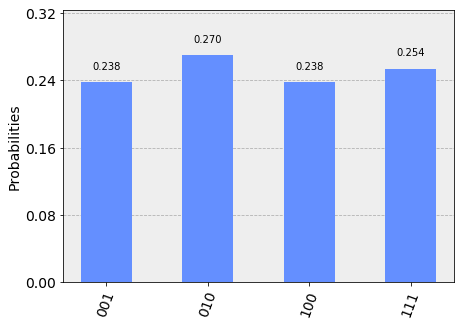

In [77]:
# Run & plot
circ.measure(q3, c3)
job = execute(circ , backend=backend)
st = job.result().get_counts()
plot_histogram(st)


In [53]:
def decode_bitstring(counts):
    decoded_string = [ '' for _ in range(4) ] # list with blank spaces for 8 bit values
    for string in counts: # loop over all 4 bit strings in result  
        pos = int(string[0:3], 2) # get integer that corresponds to first three bits
        decoded_string[pos] = string[3] # set the value of the decoded string at this position to the fouth bit
    decoded_string = ''.join(decoded_string) # turn list of 8 bit values into 8 bit string
    return decoded_string

bs1_decoded = decode_bitstring(st)
bs1_decoded

IndexError: string index out of range

          ┌───┐┌───┐┌───┐┌───┐┌─────────────┐┌───┐┌───┐┌─────────────┐┌───┐»
q25_0: |0>┤ X ├┤ X ├┤ X ├┤ X ├┤ Ry(-1.5708) ├┤ X ├┤ X ├┤ Ry(-1.5708) ├┤ X ├»
          └─┬─┘└─┬─┘└─┬─┘└─┬─┘└─────────────┘└─┬─┘└─┬─┘└─────────────┘└─┬─┘»
q25_1: |0>──■────┼────■────┼───────────────────■────┼───────────────────■──»
                 │         │                        │                      »
q25_2: |0>───────■─────────■────────────────────────■──────────────────────»
                                                                           »
 c33_0: 0 ═════════════════════════════════════════════════════════════════»
                                                                           »
 c33_1: 0 ═════════════════════════════════════════════════════════════════»
                                                                           »
 c33_2: 0 ═════════════════════════════════════════════════════════════════»
                                                                           »

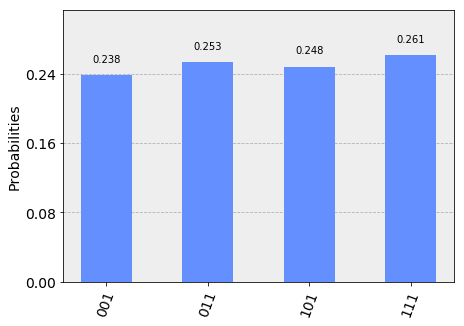

In [47]:
q3 = QuantumRegister(3)
c3 = ClassicalRegister(3)
circ_inv = QuantumCircuit(q3, c3)
circ_inv.initialize([0, .5, .5, .0, .5, .0, .0, .5], q3).inverse()
print(circ_inv)

circ_inv.measure(q3, c3)
job = execute(circ_inv , backend=backend)
st = job.result().get_counts()
plot_histogram(st)

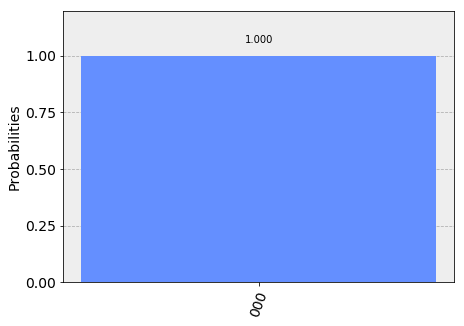

In [50]:
circ = QuantumCircuit(q3, c3)
circ.initialize([0, .5, .5, .0, .5, .0, .0, .5], q3)
circ.barrier()

circ_inv = QuantumCircuit(q3, c3)
circ_inv.initialize([0, .5, .5, .0, .5, .0, .0, .5], q3).inverse()

circ_sum = circ + circ_inv

# Run and plot
circ_sum.measure(q3, c3)
job = execute(circ_sum , backend=backend)
st = job.result().get_counts()
plot_histogram(st)

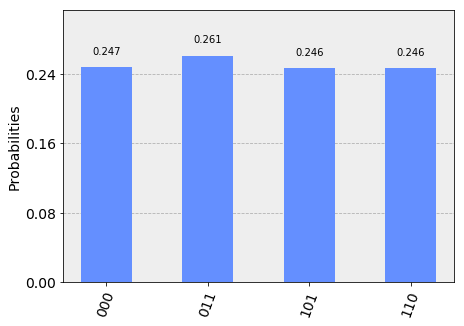

In [55]:
circ = QuantumCircuit(q3, c3)
circ.initialize([0, .5, .5, .0, .5, .0, .0, .5], q3)
circ.x(q3)

# Run and plot
circ.measure(q3, c3)
job = execute(circ , backend=backend)
st = job.result().get_counts()
plot_histogram(st)

## Encoding 7 bits on 4 qubits
The bitstring is a string of zero and ones, that represents some kind of information. This colud be interpreted as number, eg. interpreting as binary numer `1000001` is `65`, or interpreting as ASCII it is letter `A`.
For the classcial computer to store this information we need to use 7 bits.

For quantum computer, using the *Quantum Superpostion* a bitstring could be encoded and store in more comperhensive fasion. We only need to get the set of unique states that can describe the bitstring of given length. The ways is to write down the bistring in notation where first bits describes the position in a bitstring and the last one the data: zero or one. For our `1000001` it will be: 

```
   bs | pppd 
  ----|------ 
    1 | 0001 
    0 | 0010
    0 | 0100
    0 | 0110
    0 | 1000
    0 | 1010
    0 | 1100
    1 | 1111
```
So as can we see we need only 4 qubits to store the 7 length bitstring. In a quantum notation it will be:

$$ |bs> = \alpha|0001> + \alpha|0001> + ... + \alpha|1100> + \alpha|1111>$$

where $\alpha$ is the probability amplitude that needs to meet the requirement $|\alpha_1|^2 + ... + |\alpha_n|^2  = 1$. 

For example:
$ \alpha|0001>$ tells us that there is probability of $|\alpha|^2$ that the system is in state $|0001>$, and there is $0$ probability that it is in the state $|0000>$, as it doesn't occure in the equation. So we can be sure that on the first postion (`000`) of the bitstring there should be `1`. In the real quantum system, making the multiple measurements of its state will give us as a count for the every of the shown states and no measurements for the state that was not listed, that's the way that we decode the bitstring from the quantum chip. Of course in the real system there are noises, so there is a possbility that we also get the counts for the state that was not set up in the system eg. for $|0000>$, but we exlude it as in a muliple measurements it will have much lower probablity then the $|0001>$ state.

Finish it with state intialization.
Show inversion of the string and explain that the unitary matrix makes it come back to initial state. But starting with inverted circuit on the initial state will not end up in inverted bitstring in the computer science way.

## Initialzing the quantum chip

To initialize the quantum chip we will use the `qiskit.QuantumCircuit.initialize()` function. In our case we will need to prepare a init vector describing our bitstring with amplitude probabilites. As we know we can map classcial bit `0` and `1` to the following quantum base states $|0> = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$ and $|1> = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$.

We also need to calculte the $\alpha$. As the every state in this quantum system could exists in a equal probability we can use the expression: $\alpha = \sqrt{\frac{1}{2^{n-1}}}$

For the `1000001`  $\alpha = \sqrt{\frac{1}{2^{3}}} = 0.35355$ and the matrix looking like:
$|1000001> = 0.35355 * \begin{bmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} + \begin{pmatrix} 1 \\ 0 \end{pmatrix} + ... + \begin{pmatrix} 1 \\ 0 \end{pmatrix} + \begin{pmatrix} 0 \\ 1 \end{pmatrix} \end{bmatrix}$

The implementation of the following method is covered by the below `encode_bistring()` function.

In [ ]:
import math
import numpy as np
import qiskit
from qiskit import Aer
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import execute
from qiskit.tools.visualization import plot_histogram

qiskit.IBMQ.load_accounts()
backend = Aer.get_backend('qasm_simulator')
shots = 100


In [ ]:
def encode_bitstring(bitstring, qr, cr, inverse=False):
    """
    create a circuit for constructing the quantum superposition of the bitstring
    """
    n = math.ceil(math.log2(len(bitstring))) + 1  # number of qubits
    assert n > 2, "the length of bitstring must be at least 2"

    qc = QuantumCircuit(qr, cr)

    # the probability amplitude of the desired state
    desired_vector = np.array([0.0 for i in range(2 ** n)])  # initialize to zero
    amplitude = np.sqrt(1.0 / 2 ** (n - 1))
    print("amplitude: %s" % amplitude)

    for i, b in enumerate(bitstring):
        pos = i * 2
        if b == "1" or b == "M":
            pos += 1
        desired_vector[pos] = amplitude
    print("Desired vector: %s" % desired_vector)
    if not inverse:
        qc.initialize(desired_vector, [qr[i] for i in range(n)])
    else:
        qc.initialize(desired_vector, [qr[i] for i in range(n)]).inverse()  # invert the circuit
    

    return qc

Let's prepeare exmple data for our tututorial:

In [ ]:
BS1 = '1001'


In [ ]:
n = math.ceil(math.log2(len(BS1))) + 1  # number of qubits
qr = QuantumRegister(n)
cr = ClassicalRegister(n)

## BS1 write and read back

In the first step let's try to encode the bitstring BS1 to the described notation, then store it in the quantum chip, and try to read it back from the quantum machine and decode to see if we will get the orginal bitstring.

In [ ]:
qc_1 = encode_bitstring(BS1, qr, cr)
print(qc_1)

Above we can see a compostion of quantum gates that are reqiured to setup up qubits to represent our bitstring. To check if the sequence is realy setup on the device we have to add mesurement at the and of the cricut and run the quantum program (the quantum circut) on the quantum device:

In [ ]:
qc_1.measure(qr, cr)
job = execute(qc_1 , backend=backend)
st = job.result().get_counts()
plot_histogram(st)

Sending this curcit, that encodes a bit string, to the quantum chip gives us results how many times the specific state (encode as postion,value) was messured and finally the probability that it exists.

Eg. it was measured that state `0001` exists with probability $0.13$. There is no `0000` state that means that this state did occure. That make us sure that on the position `000` in a bit string there should be `1`. Anlogulsly on the posstion `001` there is `0`. 

In real life, imperfections happen. So you could use the probability to resolve ambiguities: if you find both 0000 and 0001 in your results, accept the most probable and reject the other as noise.

We can decode the string from the states above, to check if we get it back from the quantum chip.


In [ ]:
def decode_bitstring(counts):
    decoded_string = [ '' for _ in range(len(BS1)) ] # list with blank spaces for 8 bit values
    for string in counts: # loop over all 4 bit strings in result  
        pos = int(string[0:3], 2) # get integer that corresponds to first three bits
        decoded_string[pos] = string[3] # set the value of the decoded string at this position to the fouth bit
    decoded_string = ''.join(decoded_string) # turn list of 8 bit values into 8 bit string
    return decoded_string

bs1_decoded = decode_bitstring(st)
bs1_decoded

In [ ]:
bs1_decoded == BS1

## BS1_inverted measure

In [ ]:
qc_1i = encode_bitstring(BS1, qr, cr, True)
qc_1i.x(qr)
qc_1i.measure(qr, cr)
job = execute(qc_1i , backend=backend, shots=shots)
st = job.result().get_counts()
plot_histogram(st)

In [ ]:
decode_bitstring(st)

In [ ]:
print(qc_1i)

In [ ]:
qc_1i = encode_bitstring(BS1, qr, cr, True)
qc_1i.measure(qr, cr)
job = execute(qc_1i , backend=backend, shots=shots)
st = job.result().get_counts()
plot_histogram(st)

In [ ]:
decode_bitstring(st)

**(??? 4)**

Why the inverted string consist only with 1? I've exptected it to be: 10000001 > 01111110

## Comparing the BS1 with BS1_inverted

Let's denote $|BS1>$ as the superpostion state created by the `encode_bitstring(BS1, ...)` and $ |BS1_i> $ as the superpostion state created by the `encode_bitstring(BS1, ..., inverse=True)`. This states are orthogonal if:
$$ <BS1|BS1_i> = 0 $$

In [ ]:
qc_1 = encode_bitstring(BS1, qr, cr)
qc_1.barrier(qr)
qc_1i = encode_bitstring(BS1, qr, cr, True)
qc_1i.measure(qr, cr)
qc_comb = qc_1 + qc_1i
job = execute(qc_comb , backend=backend, shots=shots)
st = job.result().get_counts()
plot_histogram(st)

The initial state of any circuit is represented by `0` for all it's qubits. So in our case `0000` is the initial state of the circut - all the qubits are `0`, so far no position is set (for the first three qubits, and no data is set for the last qubit). In the initial state of the circut we dont interpreted the `0000` as the `0` bit on the first postion of the bit string.

Analising the quantum algorithm step by step:

1. We start with the initial state of the circut `0000`.
2. We initialize the circut with the BS1 string. Now the state of the circut represents the bit string.
3. We input the inverted bitstring and in the effect we get the circut back to the initial state which is `0000`. No other states where counted.


**TODO**

Explain the barrier gate.

In [ ]:
from qiskit.tools.visualization import plot_state_city
plot_state_city(vector)

## Comparing the BS1 with BS2_inverted

**TODO** We can write:
$$ |BS2> = a|BS1> + b|other\_state> $$
$$ |BS2> = a|BS1> + b|BS2_i> $$
$$ |BS1> = a|BS1> + b|BS1_i> $$
$$ |oth> = a|BS1> + b|BS2_i> $$
$$ |oth> = <BS1|BS2_i> $$


Check it...

In [ ]:
qc_1 = encode_bitstring(BS1, qr, cr)
qc_1.barrier(qr)
qc_2i = encode_bitstring(BS2, qr, cr, True)
qc_2i.measure(qr, cr)
qc_comb = qc_1 + qc_2i
job = execute(qc_comb , backend=backend, shots=shots)
st = job.result().get_counts()
plot_histogram(st)

Let's denote $ |BS1> $ as the superpostion state created by the `encode_bitstring(BS1, ...)` and $ |BS2> $ as the 
**(??? 3)**

By looking only on state 0000 we get information how simmilar are the two bitstrings. (but why only 0000 state?) 
BECAUSE THATS THE PROBABILITY THAT GO BACK TO INITIAL STATE - HOW CLOSE WE ARE.

For better basics explanation you should go through: https://qiskit.org/documentation/terra/overview.html.
